# Übung 2 - Computertomographie
***

**Name: Mai Truc Linh**
<br>
**Matr.-Nr.: 551017**
<br><br>
**Name: Ngyuen Hai Tuan Son**
<br>
**Matr.-Nr.: 557376**

## Bearbeitungszeitraum

**Bearbeitungsbegin:** Mo, 06.05.2019
<br>
**Abgabe:** So, 02.06.2018, 23:55 Uhr

---

## Aufgabenbeschreibung

Innerhalb der Radiologie werden verschiedene Verfahren zur medizinischen Bildgebung eingesetzt, u.a. das Röntgen und die Computertomographie. Beiden Verfahren liegen die physikalischen Eigenschaften der Röntgenstrahlung und deren Abschwächung bei der Durchstrahlung von Materie zugrunde. Die durch digitale Röntgen- und CT-Bilder visualisierte Messgröße ist jedoch nicht direkt die detektierte Restintensität, sondern ein Schwächungsprofil (vereinfacht kann von Ausgangsintensität - Restintensität ausgegangen werden).

Radiologische Bilder werden im standardisierten DICOM-Format gespeichert und übertragen. In einer DICOM-Datei sind neben dem eigentlichen Bild weitere Meta-Daten, z.B. Name des Patienten, Studienbezeichnung oder Parameter des Bildes, abgelegt.

Bei CT-Bildern sind die Werte der Bildpunkte in der Pixel-Matrix bereits in den aus den Schwächungsprofilen bestimmten Hounsfield Units HU angegeben (teilweise mit einem Offset versehen, um negative Werte zu vermeiden). Bereiche mit geringer Röntgenschwächung (Luft, Weichteile) führen zu hohen Restintensitäten, weisen jedoch geringe Werte auf der Hounsfield-Skala auf, so dass diese im Graustufenbild dunkel dargestellt werden. Durch diese Umrechnung von Restintensität in Hounsfield Units wird die von den Röntgenfilmen gewohnte Visualisierung (Knochen hell, Weichteile und Luft dunkel) nachempfunden (die eigentlich ausschlaggebende Motivation zur Hounsfield-Skala wurde in der Vorlesung erläutert).

#### Wichtige Anmerkungen zu Röntgen- und CT-DICOM-Bildern und deren Visualisierung:
- die Pixel-Werte der Bilddaten weisen eine höhere Bandbreite als die 256 Graustufen des RGB-Farbraums auf
    - Röntgen: i.d.R. 1024 Signalwerte (10-Bit) aber auch bis zu 4096 Signalwerte (12-Bit)
    - Computertomographie: 4096 Signalwerte (12-Bit)
- zur Visualisierung ist die Abbildung der Signalwerte in Grauwerte nötig - dies kann unterschiedlich erfolgen
    - Abbildung des gesamten Signal-Intervalls auf 256 Grauwerte - immer 4 (Röntgen) bzw. 16 (CT) Signalwerte werden auf einen Grauwert abgebildet
        - **Vorteil:** Alle Signalwerte werden visualisiert
        - **Nachteil:** Kontrast geht verloren (besonders im Bereich der Weichteile)
    - Auswahl eines diagnostisch relevanten Signalbereichs - nur Signalwerte innerhalb des Bereichs werden auf die 256 Grauwerte abgebildet (Signalwerte außerhalb des Bereichs werden auf die Grauwerte 0 bzw. 255 gesetzt); dies wird als Fensterung (Windowing) bzw. Fenster-Funktion (Window function) bezeichnet 
        - **Vorteil:** Hoher Kontrast im relevanten Signalbereich
        - **Nachteil:** Bei wechselnder Fragestellung muss Visualisierung erneut berechnet werden - ggf. müssen mehrere Grauwertbilder betrachtet werden

***

Ziel dieser Übung ist die Implementierung eines einfachen DICOM-Viewers zur Visualisierung eines CT-Bildes mit Hilfe einer interaktiven Fensterfunktion.

Für das Verarbeiten von DICOM-Bildern sollen Sie die externe Python-Bibliothek `pydicom` verwenden.

Die Bibliothek `pydicom` müssen Sie zunächst in Ihrer Python-Umgebung installieren (**auf den Laborrechnern ist dies bereits erledigt**):
1. Je nach Methode Ihrer Python-Installation müssen Sie ggf. vorher `pip` (Paket-Manager für Python-Pakete) installieren <br> Für Anaconda / Miniconda: `conda install pip`
1. Installieren Sie `pydicom`: `pip install pydicom`

Anschließend kann die Bibliothek mittels `import dicom` (Version 0.9) bzw. `import pydicom` (Version 1.x) in Ihren Python-Code eingebunden werden.

Die Dokumentation von `pydicom` finden Sie hier: <https://github.com/pydicom/pydicom>

Auf den Laborrechnern ist nicht die aktuelle Version von `pydicom` installiert. Dies ist für diese Übung nicht schlimm, achten Sie bei der Verwendung der Dokumentation aber auf die von Ihnen verwendeten Version. Um zu prüfen welche Version Sie verwenden, können Sie auf der Kommandozeile folgenden Befehl nutzen: `pip show pydicom`

Das in der Übung verwendete CT-Bild entstammt: *The Visible Human Project*: <https://www.nlm.nih.gov/research/visible/>

Bildquelle: <https://mri.radiology.uiowa.edu/visible_human_datasets.html> (Visible Male CT Datasets / Shoulder / vhm.840.dcm).


**Generelle Hinweise zur Bearbeitung:** 

Für die Visualisierung soll (sofern nicht anders angegeben) das `matplotlib`-Paket verwendet werden. Alle Bilder sollen *inline* in diesem Notebook ausgegeben werden.


**Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Ergänzen Sie den Dateinamen des Notebooks vor der Abgabe um `_` und Ihre Matr.-Nr. (`Uebung 2 - Roentgen und CT_s0500000.ipynb`)
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Datei `dicom_ct.dcm` muss nicht abgegeben werden.

**Hinweise zur Benotung**

- Die Aufgabe wird nach dem üblichen Notenschema von 1,0 bis 5,0 bewertet.
- Diese Aufgabe wird mit 35% in der Gesamtnote der Übung gewichtet.


### Viel Erfolg!

---
---

### Aufgaben:

**1. Einlesen und Visualisieren des DICOM-Bildes**

Lesen sie die DICOM-Datei mit Hilfe der `pydicom`-Bibliothek ein.
Visualisieren Sie das in der Datei enthaltene Bild (verwenden Sie die Funktionen `imshow` und `show` aus `matplotlib`).

Ergänzen Sie Ihre Visualisierung des Bildes um zusätzliche Meta-Daten (in Textform), die Sie aus der DICOM-Datei auslesen. Verwenden Sie hierfür beispielhaft mindestens **sechs** relevante Daten, z.B. Patientenname, Zeilen- und Spaltenanzahl des Bildes. Visualisieren Sie den Textblock *ansprechend* als Erläuterung zum Bild in Form von Key-Value-Paaren, d.h. achten Sie auf Formatierung, Anordnung, etc.

Ziehen Sie zur Lösung der Aufgabe die Dokumentation der `pydicom`-Bibliothek heran (z.B. für Version 0.9: <https://pydicom.github.io/pydicom/0.9/viewing_images.html> - Using pydicom with matplotlib; Ersetzen Sie aber den Import und den Aufruf von `pylab` mit `import matplotlib.pyplot as plt` bzw. `plt.functionName`).

Ein Parameter der `imshow`-Funktion ist die Colormap (Parameter `cmap`). Über die Colormap wird festgelegt, wie die Werte im Bild (bzw. im Pixel-Array) interpretiert werden sollen. Experimentieren Sie mit verschiedenen Einstellungen für die Colormap und achten Sie auf die Unterschiede (Sie können den Parameter auch ganz weglassen). Zur Abgabe wählen Sie die Colormap `bone` (diese Colormap betont den Blaukanal, was den typischen *Blaustich* von alten Film-Röntgenbildern nachempfinden soll).

Row number.......: 512
Column number....: 512



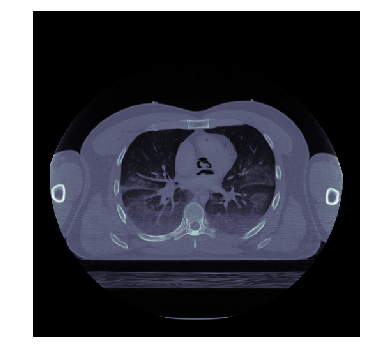

Patient's name...: Adam
Patient id.......: 000-000-002 
Modality.........: CT
Study Date.......: 20050101


In [1]:
import pydicom
import pylab
import matplotlib.pyplot as plt

%matplotlib inline

#print(__doc__)

dataset = pydicom.read_file('dicom_ct.dcm')

#print()
#print("Filename.........:", dataset)
#print("Storage type.....:", dataset.SOPClassUID)
#print()
print("Row number.......:",dataset.Rows)
print("Column number....:",dataset.Columns)
print()

plt.figure(figsize=(10,6))
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.axis('off')
plt.show()

pat_name = dataset.PatientName
display_name = pat_name.family_name+pat_name.given_name
print("Patient's name...:",display_name)
print("Patient id.......:",dataset.PatientID)
print("Modality.........:",dataset.Modality)
print("Study Date.......:",dataset.StudyDate)

**2. Implementierung einer Fenster-Funktion**

Implementieren Sie eine Funktion zur Fensterung der Pixel-Werte.

Sehen Sie für Ihre Funktion zwei Parameter zur Festlegung der unteren und oberen Grenze des Signalbereichs vor.

Graphische Darstellung einer linearen Fensterfunktion:

![windowFunction](windowFunction.svg)

Visualisieren Sie das Ergebnisbild nach Anwendung der Funktion mit den Grenzwerten 0 und 1000.

**Hinweise:**
- Obwohl die Hounsfield-Skala die Werte von -1024 bis 3071 umfasst, sind die Signalwerte im Intervall 0 bis 4095 in der Datei gespeichert (so kann das Vorzeichen eingespart werden). Ein ebenfalls in der Datei angegebener Offset legt fest, wie die Werte verändert werden müssen, um wieder auf die Hounsfield-Skala zu gelangen. Ihre Fenster-Funktion soll auf den Werten des Bildes (0 - 4095) arbeiten. Der Offset kommt erst in **Aufgabe 3** zur Anwendung.
- Die aus der DICOM-Datei mittels `pydicom` eingelesenen Pixel-Daten liegen als `numpy`-Array vor. Achten Sie bei Ihrer Implementierung darauf, dass Sie die speziellen `numpy`-Funktionen für alle Zugriffe auf das Array verwenden.
- Legen sie vor jedem Aufruf Ihrer Fenster-Funktion eine **tiefe** Kopie der Pixel-Werte aus der DICOM-Datei an (auf der Sie dann arbeiten), da Sie sonst die DICOM-Datei immer neu einlesen müssten, falls Sie dort die Pixelwerte verändern.
- In Abhängigkeit Ihrer Implementierung kann die Fenster-Funktion einige Sekunden benötigen. Sollte es wesentlich länger dauern, prüfen Sie, ob Sie versehentlich eine nicht-`numpy`-Funktion für den Zugriff auf das Pixel-Array verwenden.
- Verwenden Sie ab dieser Aufgabe die Colormap `gray` für alle folgenden Visualisierungen.

0 1000


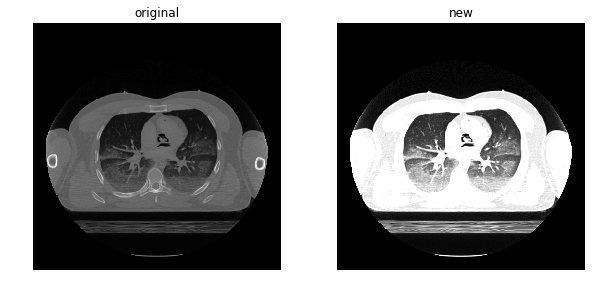

In [2]:
import numpy as np

#print(dataset_copy.min()) # werte in einzelnen Pixel stehen
#print(dataset_copy.max())

#lower_limit=center+(width/2)-offset
#upper_limit=center-(width/2)-offset

def my_fenster(lower_limit, upper_limit):
    dataset_copy = np.copy(dataset.pixel_array)
    
    # values outside interval clipped to interval edges
    # values smaller than 0 become 0, larger than 1000 become 1000
    clip_pixel = np.clip(dataset_copy, lower_limit, upper_limit, out=None)
    new_clip = clip_pixel-lower_limit # soll beginnen am UG
    new_new_clip = new_clip*(255/(upper_limit-lower_limit))
    print(lower_limit,upper_limit)

    plt.figure(figsize=(10,10))

    plt.subplot(2,2,1)
    plt.title('original')
    plt.axis('off')
    plt.imshow(dataset.pixel_array, cmap=plt.cm.gray)

    plt.subplot(2,2,2)
    plt.title('new')
    plt.axis('off')
    plt.imshow(new_new_clip, cmap=plt.cm.gray)

    plt.show()
    
my_fenster(0,1000)

**3. Interaktive Visualisierung als DICOM-Viewer**

Realisieren Sie Ihre Fenster-Funktion aus **Aufgabe 2** als interaktiven DICOM-Viewer.

Nutzen Sie die Funktionen zur Erstellung einer interaktiven Visualisierung aus dem `ipywidgets`-Paket (siehe auch Demo-Notebook -> Beispiel Gauss-Filter). Sehen Sie zwei Slider vor, über die folgende Parameter der Fensterung festgelegt werden können:
1. Zentrum des Fensters
2. Breite des Fensters

Die in den Pixel-Daten gespeicherten Werte sind im Bereich von 0 bis 4095 angegeben. Dies entspricht nicht der Hounsfield-Skala. Daher ist in den Meta-Daten der vorliegenden DICOM-Datei zusätzlich ein Offset (`Rescale Intercept`)  angegeben. Lesen Sie den Wert des Parameters `Rescale Intercept` aus der DICOM-Datei aus. Um vom Pixel-Wert auf die wirklichen Hounsfield Units zu gelangen, muss der Wert des Offsets addiert werden (Pixel-Wert 0 entspricht $0 + Offset$ in HU; der Offset ist negativ, daher ist hier eine Addition notwendig).

Über die Slider Ihres Viewers sollen die Werte in HU angegeben werden, d.h. Sie müssen die untere und obere Grenze aus den Werten für das Zentrum und der Breite berechnen und dabei den Offset berücksichtigen. Achten Sie hierbei auf das Vorzeichen des Offsets und die Richtung der Konvertierung.

Als Wertebereiche der Slider verwenden Sie:
- Zentrum: -1024 bis 3071
- Breite: 0 bis 4095
- Schrittweite jeweils 1

Prüfen Sie vor dem Aufruf der Fenster-Funktion auf zulässige Grenzwerte und korrigieren Sie unzulässige Werte, so dass die Fensterfunktion keinen Fehler verursacht und immer ein *sinnvolles* Ergibnisbild angezeigt wird.

Da die Fenster-Funktion eine recht hohe Laufzeit haben *kann*, soll Sie immer nur dann ausgeführt werden, wenn die Slider *losgelassen* werden. Dies kann über den Parameter `continuous_update=False` bei der Definition der Slider-festgelegt werden (siehe auch Demo-Notebook -> Beispiel Gauss-Filter).

**Hinweise:**
- Achten Sie auch hier darauf, das Sie immer auf einer neuen, tiefen Kopie der Pixel-Daten arbeiten.

In [5]:
import ipywidgets as widgets
from ipywidgets import interact, fixed

offset = dataset.RescaleIntercept 

def dicom_viewer(center,width):
    # two division operators = floor division (rounds down neares whole number)
    lower_limit = center-(width//2)-offset # int anstatt float wert 
    upper_limit = center+(width//2)-offset
    print(lower_limit,upper_limit)

    if(lower_limit<0):
        center = (width//2) # center wird neu berechnet
        lower_limit = center-(width//2)
        upper_limit = center+(width//2)
        
    if(upper_limit>4095):
        center = 4095-(width//2)
        lower_limit = center-(width//2)
        upper_limit = center+(width//2)
        
    my_fenster(lower_limit,upper_limit)
    print(my_fenster)
    

interact(dicom_viewer,
         center=widgets.IntSlider(min=-1024, max=3071, value=0, step=1, continous_update=False),\
         width=widgets.IntSlider(min=0, max=4095, value=1000, step=1, continous_update=False)
        )

interactive(children=(IntSlider(value=0, description='center', max=3071, min=-1024), IntSlider(value=1000, des…

<function __main__.dicom_viewer(center, width)>

---
---

### Bonusaufgaben (optional)

- Ändern Sie Ihre Implementierung aus **Aufgabe 3** so, dass zusätzlich zu den Slidern auch zwei Textboxen zur Eingabe der Werte für Zentrum und Breite des Fensters angezeigt werden. Jeder Slider soll dabei mit jeweils einer der Textboxen *verlinkt* werden, so dass der eingestellte / eingegebene Wert gegenseitig übernommen wird. Sind Ihre Widgets korrekt *verlinkt*, können Sie `interact` wie in **Aufgabe 3** mit den Slidern aufrufen und die Textboxen über `display(centerBox, widthBox)` zusätzlich anzeigen. Orientieren Sie sich hierzu an der Dokumentation der interaktiven Widgets (<https://ipywidgets.readthedocs.io/en/latest/> - insbesondere **Widget Events - Linking Widgets**).
- Erweitern Sie Ihre Implementierung aus **Aufgabe 3** um einen dritten Slider, über den ein Schwellenwert (Grenzen 0 und 255, Schrittweite 1, Standardwert 127) für eine Binärkonvertierung festgelegt werden kann. Konvertieren Sie das Ergebnisbild aus der Fenster-Funktion unter Verwendung des Schwellenwertes in ein Binärbild. Eine einfache Konvertierung kann durch folgende Zeile erreicht werden: `binary_image = (image >= schwellenwert) * 1`. Visualisieren Sie Ihr Ergebnis zusammen mit weiteren Bildern in einem 2*2-Raster:
    - Ergebnisbild der Fenster-Funktion (wie in **Aufgabe 3**)
    - Binärbild mit Colormap `gray`
    - Originalbild mit Colormap `bone`
    - Originalbild mit Colormap `gray`

Weitere Bonus-Funktionen sind nach Rücksprache ebenfalls möglich.

Für die Realisierung der Bonus-Funktion nutzen Sie bitte zusätzliche Notebook-Zellen unterhalb dieser Erläuterung, so dass die Bonus-Funktionen keine Randeffekte im *Pflichtteil* hervorrufen. Kopieren Sie hierzu, falls nötig, benötigte Teile Ihrer bisherigen Lösungen bover Sie Veränderungen vornehmen. 

Stellen Sie Ihrer Bonus-Implementierung eine **kurze** Erläuterung der umgesetzten Funktion(en) voraus.

Für das Erreichen der Bonuspunkte genügt die Umsetzung **einer** der genannten bzw. selbst ausgewählten Funktionalitäten!